In [4]:
import gensim
import numpy as np
from gensim.test.utils import common_corpus, common_dictionary
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim.models import HdpModel

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# create sample documents
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 

# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = gensim.corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
#hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
#hdpmodel.show_topics(formatted=False)

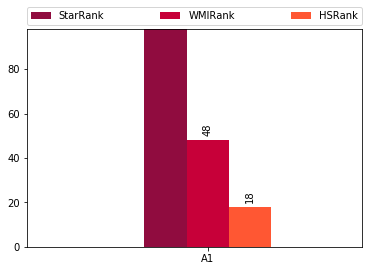

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

raw_data = {'plan_type': ['A1'],
        'StarRank':     [98],
        'WMIRank':     [48],
        'HSRank':     [18]
    }

df = pd.DataFrame(raw_data, columns = ['plan_type', 'StarRank', 'WMIRank', 'HSRank'])
ax = df.plot.bar(rot=0, color=["#900C3F", '#C70039', '#FF5733'], width = 0.35 )

for p in ax.patches[1:]:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2.
    if h != 0:
        ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,4), rotation=90, 
                   textcoords="offset points", ha="center", va="bottom")

ax.set_xlim(-0.5, None)
ax.margins(y=0)
ax.legend(ncol=len(df.columns), loc="lower left", bbox_to_anchor=(0,1.02,1,0.08), borderaxespad=0, mode="expand")
ax.set_xticklabels(df["plan_type"])
plt.show()